In [34]:
!pip install datasets

In [35]:
!pip install yellowbrick

In [36]:
!pip install neattext

In [1]:
import datasets as huggingFaceDatasets
import pandas as pd
import numpy as np
import nltk 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
import re
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import neattext.functions as nfx
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,CategoricalNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix,silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\samik\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [243]:
print(huggingFaceDatasets.list_datasets())

['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews', 'allocine', 'alt', 'amazon_polarity', 'amazon_reviews_multi', 'amazon_us_reviews', 'ambig_qa', 'americas_nli', 'ami', 'amttl', 'anli', 'app_reviews', 'aqua_rat', 'aquamuse', 'ar_cov19', 'ar_res_reviews', 'ar_sarcasm', 'arabic_billion_words', 'arabic_pos_dialect', 'arabic_speech_corpus', 'arcd', 'arsentd_lev', 'art', 'arxiv_dataset', 'ascent_kb', 'aslg_pc12', 'asnq', 'asset', 'assin', 'assin2', 'atomic', 'autshumato', 'babi_qa', 'banking77', 'bbaw_egyptian', 'bbc_hindi_nli', 'bc2gm_corpus', 'beans', 'best2009', 'bianet', 'bible_para', 'big_patent', 'billsum', 'bing_coronavirus_query_set', 'biomrc', 'biosses', 'blbooks', 'blbooksgenre', 'blended_skill_talk', 'blimp', 'blog_authorship_corpus', 'bn_hate_speech', 'bnl_newspapers', 'bookcorpus', 'bookcorpusopen', 'boolq', 'bprec', 'break_data', 'brwac', 'bsd_ja_en', 'bswac'

In [2]:
emotions_train = huggingFaceDatasets.load_dataset('emotion',split='train')
emotions_test = huggingFaceDatasets.load_dataset('emotion',split='test')

Using custom data configuration default
Reusing dataset emotion (C:\Users\samik\.cache\huggingface\datasets\emotion\default\0.0.0\348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)
Using custom data configuration default
Reusing dataset emotion (C:\Users\samik\.cache\huggingface\datasets\emotion\default\0.0.0\348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


In [3]:
emotions_train = emotions_train.add_column('emo',emotions_train.features['label'].int2str(emotions_train['label']))
emotions_test = emotions_test.add_column('emo',emotions_test.features['label'].int2str(emotions_test['label']))

In [4]:
df = emotions_train.to_pandas() 
df_test = emotions_test.to_pandas()

Text(0, 0.5, 'Number of Records')

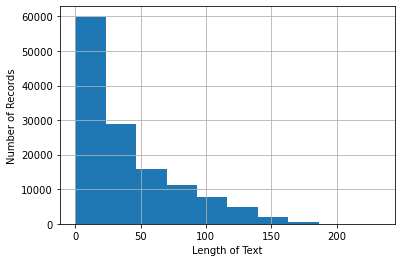

In [141]:
pl = df_tweets['content'].str.len().hist()
pl.set_xlabel("Length of Text")
pl.set_ylabel("Number of Records")

Text(0, 0.5, 'Number of Records')

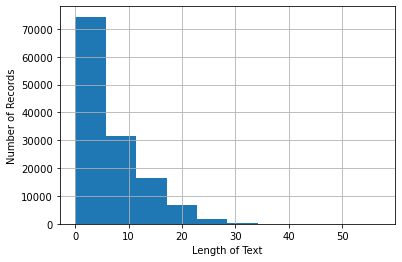

In [118]:
pl = df_tweets['content'].str.split().\
    map(lambda x: len(x)).\
    hist()
pl.set_xlabel("Length of Text")
pl.set_ylabel("Number of Records")

In [131]:
corpus=[]
tex= df_tweets['content'].str.split()
tex=tex.values.tolist()
corpus=[word for i in tex for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stopwords_list:
        dic[word]+=1
        
#top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 
#x,y=zip(*top)
#plt.xticks(rotation='vertical')
#plt.bar(x,y)
#plt.xlabel("Stopwords")
#plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

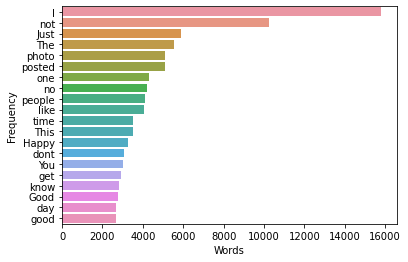

In [133]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stopwords_list):
        x.append(word)
        y.append(count)
        
pl=sns.barplot(x=y,y=x)
plt.xlabel("Words")
plt.ylabel("Frequency")

In [41]:
print(df['emo'].unique())
print(df['emo'].value_counts())

['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emo, dtype: int64


C:\Users\samik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


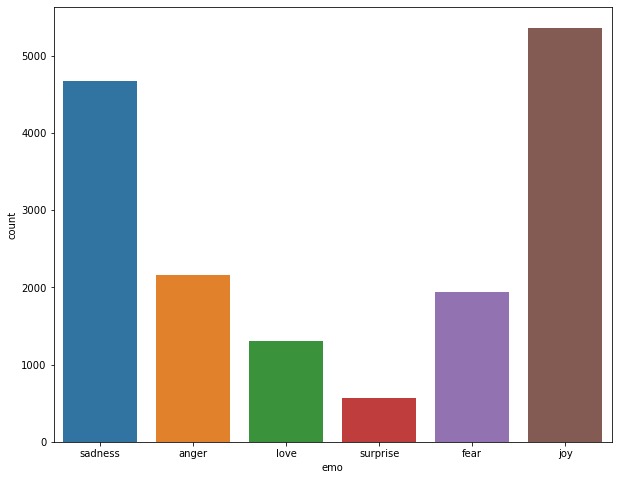

In [42]:
plt.figure(figsize = (10,8))
sns.countplot(df['emo'])
plt.show()

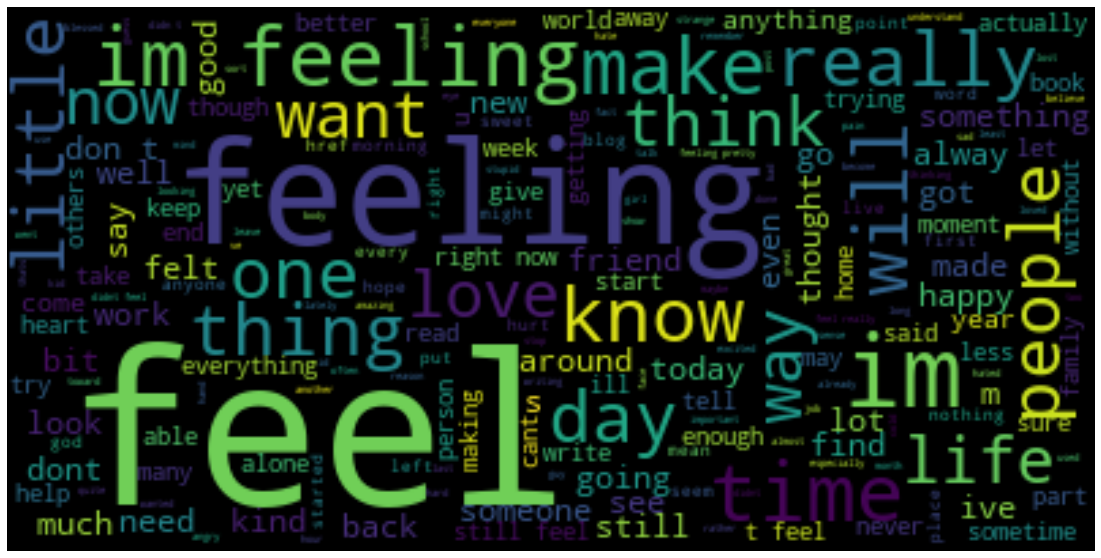

In [43]:
list = df['text'].tolist()
doc = ' '.join(list)

def plot_wordcloud(docx):
    x = WordCloud().generate(docx)
    plt.figure(figsize = (20,10))
    plt.imshow(x, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
plot_wordcloud(doc)

In [15]:
## Data preprocessing

In [5]:
df['text'] = df['text'].apply(nfx.remove_punctuations)
df_test['text'] = df_test['text'].apply(nfx.remove_punctuations)

In [6]:
df['text'] = df['text'].apply(nfx.remove_urls)
df_test['text'] = df_test['text'].apply(nfx.remove_urls)
df['text'] = df['text'].apply(nfx.remove_special_characters)
df_test['text'] = df_test['text'].apply(nfx.remove_special_characters)
df['text'] = df['text'].apply(nfx.remove_emojis)
df_test['text'] = df_test['text'].apply(nfx.remove_emojis)

In [7]:
df['text'] = df['text'].apply(nfx.remove_userhandles)
df_test['text'] = df_test['text'].apply(nfx.remove_userhandles)

In [8]:
df.apply(lambda x: x.astype(str).str.lower())
df_test.apply(lambda x: x.astype(str).str.lower())

,text,label,emo
0,im feeling rather rotten so im not very ambiti...,0,sadness
1,im updating my blog because i feel shitty,0,sadness
2,i never make her separate from me because i do...,0,sadness
3,i left with my bouquet of red and yellow tulip...,1,joy
4,i was feeling a little vain when i did this one,0,sadness
...,...,...,...
1995,i just keep feeling like someone is being unki...,3,anger
1996,im feeling a little cranky negative after this...,3,anger
1997,i feel that i am useful to my people and that ...,1,joy
1998,im feeling more comfortable with derby i feel ...,1,joy


In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
stopwords_list = stopwords.words('english')
stopwords_list.remove('wasn')
stopwords_list.remove('ain')
stopwords_list.remove("wasn't")
stopwords_list.remove('weren')
stopwords_list.remove("weren't")
stopwords_list.remove("won't")
stopwords_list.remove("wouldn't")
stopwords_list.remove('needn')
stopwords_list.remove("needn't")
stopwords_list.remove('shan')
stopwords_list.remove("shan't")
stopwords_list.remove("shouldn't")
stopwords_list.remove("hadn't")
stopwords_list.remove("hasn't")
stopwords_list.remove("haven't")
stopwords_list.remove("isn't")
stopwords_list.remove("mightn't")
stopwords_list.remove("mustn't")
stopwords_list.remove('no')
stopwords_list.remove('nor')
stopwords_list.remove('not')
stopwords_list.remove('don')
stopwords_list.remove("don't")
stopwords_list.remove('aren')
stopwords_list.remove('won')
stopwords_list.remove('wouldn')
stopwords_list.remove('couldn')
stopwords_list.remove('shouldn')
stopwords_list.remove("aren't")
stopwords_list.remove("couldn't")
stopwords_list.remove('didn')
stopwords_list.remove("didn't")
stopwords_list.remove('doesn')
stopwords_list.remove("doesn't")
stopwords_list.remove('hadn')
stopwords_list.remove('hasn')
stopwords_list.remove('haven')
stopwords_list.remove('isn')
stopwords_list.remove('mightn')
stopwords_list.remove('mustn')

In [11]:
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [12]:
df['text'] = df['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords_list]))
df_test['text'] = df_test['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords_list]))

In [13]:
df['text'] = df['text'].apply(nfx.remove_html_tags)
df['text'] = df['text'].apply(nfx.remove_numbers)
df_test['text'] = df_test['text'].apply(nfx.remove_html_tags)
df_test['text'] = df_test['text'].apply(nfx.remove_numbers)

<AxesSubplot:>

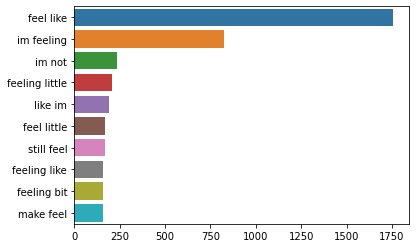

In [62]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_n_bigrams=get_top_ngram(df['text'],2)[:40] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

In [59]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()
stop = stopwords_list


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)



# Lemmatizing
df['text'] = df['text'].apply(lambda x: lemmatize_sentence(x))
print(df.head())

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\samik\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


                                                text  label      emo
0                               didnt feel humiliate      0  sadness
1  go feeling hopeless damn hopeful around someon...      0  sadness
2              im grab minute post feel greedy wrong      3    anger
3  ever feel nostalgic fireplace know still property      2     love
4                                       feel grouchy      3    anger


<AxesSubplot:xlabel='pred', ylabel='content'>

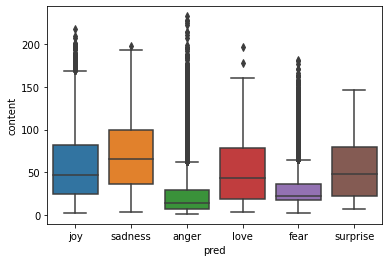

In [134]:
sns.boxplot(x=df4['pred'], y=df4['content'].str.len(), data=df)

In [14]:
df['tokenized_text'] = df['text'].apply(nltk.word_tokenize)
df_test['tokenized_text'] = df_test['text'].apply(nltk.word_tokenize)
df

,text,label,emo,tokenized_text
0,didnt feel humiliated,0,sadness,"[didnt, feel, humiliated]"
1,go feeling hopeless damned hopeful around some...,0,sadness,"[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing minute post feel greedy wrong,3,anger,"[im, grabbing, minute, post, feel, greedy, wrong]"
3,ever feeling nostalgic fireplace know still pr...,2,love,"[ever, feeling, nostalgic, fireplace, know, st..."
4,feeling grouchy,3,anger,"[feeling, grouchy]"
...,...,...,...,...
15995,brief time beanbag said anna feel like beaten,0,sadness,"[brief, time, beanbag, said, anna, feel, like,..."
15996,turning feel pathetic still waiting tables sub...,0,sadness,"[turning, feel, pathetic, still, waiting, tabl..."
15997,feel strong good overall,1,joy,"[feel, strong, good, overall]"
15998,feel like rude comment im glad,3,anger,"[feel, like, rude, comment, im, glad]"


In [151]:
#Feature Extraction

In [15]:
#### build features from text
Xfeatures = df['tokenized_text']
ylabels = df['emo']
Xfeaturestest = df_test['tokenized_text']
ytest = df_test['emo']
print(Xfeatures)
print(ylabels)

0                                [didnt, feel, humiliated]
1        [go, feeling, hopeless, damned, hopeful, aroun...
2        [im, grabbing, minute, post, feel, greedy, wrong]
3        [ever, feeling, nostalgic, fireplace, know, st...
4                                       [feeling, grouchy]
                               ...                        
15995    [brief, time, beanbag, said, anna, feel, like,...
15996    [turning, feel, pathetic, still, waiting, tabl...
15997                        [feel, strong, good, overall]
15998                [feel, like, rude, comment, im, glad]
15999              [know, lot, feel, stupid, not, portray]
Name: tokenized_text, Length: 16000, dtype: object
0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
15995    sadness
15996    sadness
15997        joy
15998      anger
15999    sadness
Name: emo, Length: 16000, dtype: object


In [24]:
#vectorizer
tfidf = TfidfVectorizer(preprocessor=' '.join,min_df=10, use_idf=True,sublinear_tf= True, ngram_range=(1,2))    
X = tfidf.fit_transform(Xfeatures).toarray()
X_test = tfidf.transform(Xfeaturestest)
df = pd.DataFrame(X, columns=tfidf.get_feature_names())
df

C:\Users\samik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abilities,ability,able,absolutely,abused,accept,acceptable,accepted,accident,accomplished,...,yes,yesterday,yet,yet feel,yoga,young,younger,youre,youve,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# get features by name 
tfidf.get_feature_names()

AttributeError: 'TfidfVectorizer' object has no attribute 'get_features'

In [154]:
#### naive bayes
nv_model = MultinomialNB()
nv_model.fit(X,ylabels) 
bv_model = BernoulliNB()
bv_model.fit(X,ylabels)

BernoulliNB()

In [155]:
#### svm
svm_model = svm.SVC()
svm_model.fit(X,ylabels)

SVC()

In [156]:
#### knn
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X,ylabels)

KNeighborsClassifier(n_neighbors=10)

In [157]:
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [158]:
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X,ylabels)
y_predd = dTree_clf.predict(X_test)
accuracy_score(ytest,y_predd)

0.875

In [159]:
print(confusion_matrix(ytest,y_predd))  
print(classification_report(ytest,y_predd))  
print(accuracy_score(ytest, y_predd))

[[251   5   7   1   9   2]
 [  8 186   2   2  12  14]
 [ 10   7 612  43  14   9]
 [  3   0  28 125   1   2]
 [ 17  14  13   6 526   5]
 [  1  12   2   0   1  50]]
              precision    recall  f1-score   support

       anger       0.87      0.91      0.89       275
        fear       0.83      0.83      0.83       224
         joy       0.92      0.88      0.90       695
        love       0.71      0.79      0.74       159
     sadness       0.93      0.91      0.92       581
    surprise       0.61      0.76      0.68        66

    accuracy                           0.88      2000
   macro avg       0.81      0.85      0.83      2000
weighted avg       0.88      0.88      0.88      2000

0.875


In [172]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X,ylabels)
predictions = xgb_classifier.predict(X_test)
accuracy_score(ytest,predictions)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got ['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']

In [ ]:
print(confusion_matrix(ytest,predictions))  
print(classification_report(ytest,predictions))  
print(accuracy_score(ytest, predictions))

In [168]:
classifier = RandomForestClassifier()
classifier.fit(X,ylabels)
y_predr = classifier.predict(X_test)
accuracy_score(ytest,y_predr)

0.8865

In [179]:
!pip install scikit-plot

<AxesSubplot:title={'center':'Confusion Matrix for SGD'}, xlabel='Predicted label', ylabel='True label'>

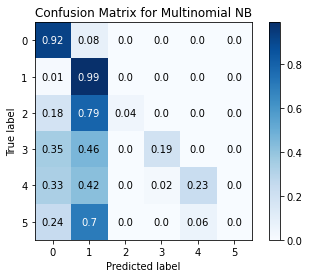

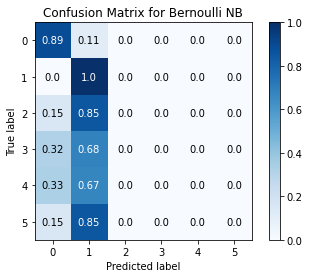

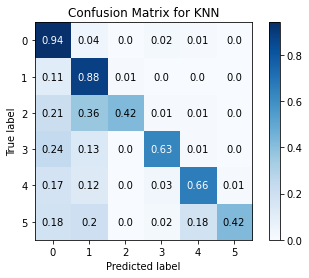

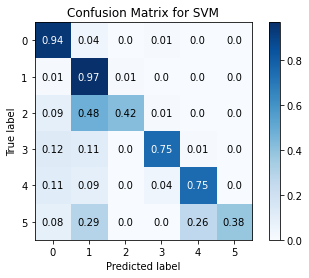

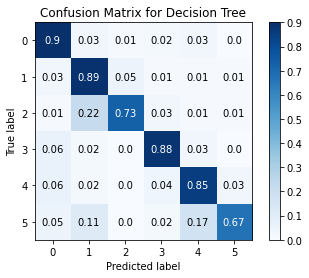

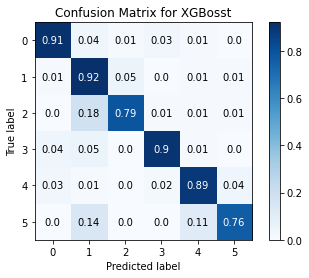

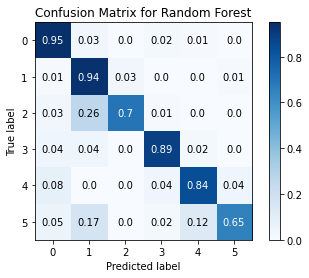

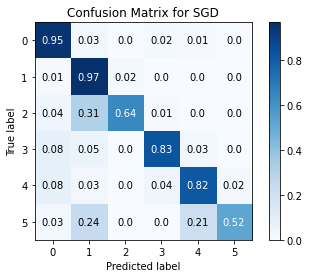

In [181]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(ytest, ypred1, normalize=True, title = 'Confusion Matrix for Multinomial NB')
skplt.metrics.plot_confusion_matrix(ytest, ypred2, normalize=True, title = 'Confusion Matrix for Bernoulli NB')
skplt.metrics.plot_confusion_matrix(ytest, ypred4, normalize=True, title = 'Confusion Matrix for KNN')
skplt.metrics.plot_confusion_matrix(ytest, ypred3, normalize=True, title = 'Confusion Matrix for SVM')
skplt.metrics.plot_confusion_matrix(ytest, y_predd, normalize=True, title = 'Confusion Matrix for Decision Tree')
skplt.metrics.plot_confusion_matrix(ytest, predictions, normalize=True, title = 'Confusion Matrix for XGBosst')
skplt.metrics.plot_confusion_matrix(ytest, y_predr, normalize=True, title = 'Confusion Matrix for Random Forest')
skplt.metrics.plot_confusion_matrix(ytest, y_predsgd, normalize=True, title = 'Confusion Matrix for SGD')

In [171]:
print(confusion_matrix(ytest,y_predr))  
print(classification_report(ytest,y_predr))  
print(accuracy_score(ytest, y_predr))

[[242   3  13   0  17   0]
 [ 10 184   5   0  16   9]
 [  0   1 655  22  13   4]
 [  3   0  39 108   8   1]
 [ 15   3  18   0 545   0]
 [  1  11  13   0   2  39]]
              precision    recall  f1-score   support

       anger       0.89      0.88      0.89       275
        fear       0.91      0.82      0.86       224
         joy       0.88      0.94      0.91       695
        love       0.83      0.68      0.75       159
     sadness       0.91      0.94      0.92       581
    surprise       0.74      0.59      0.66        66

    accuracy                           0.89      2000
   macro avg       0.86      0.81      0.83      2000
weighted avg       0.88      0.89      0.88      2000

0.8865


In [ ]:
ypred1 = nv_model.predict(X_test)
ypred2 = bv_model.predict(X_test)
ypred3 = svm_model.predict(X_test)
ypred4 = knn_model.predict(X_test)

In [169]:
# Fitting SGD Classifier to the Training set
model = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)
model.fit(X, ylabels)
# Predicting the results
y_predsgd = model.predict(X_test)
accuracy_score(ytest, y_predsgd)

0.8875

In [170]:
print(confusion_matrix(ytest,y_predsgd))  
print(classification_report(ytest,y_predsgd))  
print(accuracy_score(ytest, y_predsgd))

[[231   8  14   1  21   0]
 [  9 183   8   0  18   6]
 [  1   2 667  17   7   1]
 [  2   0  45 105   7   0]
 [ 10   3  14   0 554   0]
 [  0  13  14   0   4  35]]
              precision    recall  f1-score   support

       anger       0.91      0.84      0.87       275
        fear       0.88      0.82      0.85       224
         joy       0.88      0.96      0.92       695
        love       0.85      0.66      0.74       159
     sadness       0.91      0.95      0.93       581
    surprise       0.83      0.53      0.65        66

    accuracy                           0.89      2000
   macro avg       0.88      0.79      0.83      2000
weighted avg       0.89      0.89      0.88      2000

0.8875


In [117]:
##### Accuracy 1
#print(nv_model.score(X_test,ytest))
#print(bv_model.score(X_test,ytest))
#print(svm_model.score(X_test,ytest))
print(knn_model.score(X_test,ytest))

#print(accuracy_score(ytest,ypred1))
#print(accuracy_score(ytest,ypred2))
#print(accuracy_score(ytest,ypred3))
print(accuracy_score(ytest,ypred4))

0.782
0.782


In [164]:
predictions = nv_model.predict(X_test)
print(confusion_matrix(ytest,predictions))  
print(classification_report(ytest,predictions))  
print(accuracy_score(ytest, predictions))

[[ 41   0 140   0  94   0]
 [  1  45 108   0  70   0]
 [  0   0 692   0   3   0]
 [  0   0 128   5  26   0]
 [  0   1  49   0 531   0]
 [  0   4  48   0  14   0]]
              precision    recall  f1-score   support

       anger       0.98      0.15      0.26       275
        fear       0.90      0.20      0.33       224
         joy       0.59      1.00      0.74       695
        love       1.00      0.03      0.06       159
     sadness       0.72      0.91      0.81       581
    surprise       0.00      0.00      0.00        66

    accuracy                           0.66      2000
   macro avg       0.70      0.38      0.37      2000
weighted avg       0.73      0.66      0.57      2000

0.657


C:\Users\samik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
 predictions = bv_model.predict(X_test)
print(confusion_matrix(ytest,predictions))  
print(classification_report(ytest,predictions))  
print(accuracy_score(ytest, predictions))

[[  0   0 243   0  32   0]
 [  0   0 196   0  28   0]
 [  0   0 695   0   0   0]
 [  0   0 157   0   2   0]
 [  0   1 213   0 367   0]
 [  0   0  62   0   4   0]]
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       275
        fear       0.00      0.00      0.00       224
         joy       0.44      1.00      0.61       695
        love       0.00      0.00      0.00       159
     sadness       0.85      0.63      0.72       581
    surprise       0.00      0.00      0.00        66

    accuracy                           0.53      2000
   macro avg       0.22      0.27      0.22      2000
weighted avg       0.40      0.53      0.42      2000

0.531


C:\Users\samik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [166]:
predictions = svm_model.predict(X_test)
print(confusion_matrix(ytest,predictions))  
print(classification_report(ytest,predictions))  
print(accuracy_score(ytest, predictions))

[[193   2  37   0  43   0]
 [  8 156  31   0  29   0]
 [  2   2 673  10   6   2]
 [  4   0  83  56  16   0]
 [  8   2  27   0 544   0]
 [  0  16  24   0   6  20]]
              precision    recall  f1-score   support

       anger       0.90      0.70      0.79       275
        fear       0.88      0.70      0.78       224
         joy       0.77      0.97      0.86       695
        love       0.85      0.35      0.50       159
     sadness       0.84      0.94      0.89       581
    surprise       0.91      0.30      0.45        66

    accuracy                           0.82      2000
   macro avg       0.86      0.66      0.71      2000
weighted avg       0.83      0.82      0.81      2000

0.821


In [167]:
predictions = knn_model.predict(X_test)
print(confusion_matrix(ytest,predictions))  
print(classification_report(ytest,predictions))  
print(accuracy_score(ytest, predictions))

[[190   5  37   1  42   0]
 [ 15 163  16   0  27   3]
 [ 16   7 604  10  57   1]
 [  2   3  54  74  26   0]
 [ 21  10  41   1 508   0]
 [  1  14  19   0   6  26]]
              precision    recall  f1-score   support

       anger       0.78      0.69      0.73       275
        fear       0.81      0.73      0.77       224
         joy       0.78      0.87      0.82       695
        love       0.86      0.47      0.60       159
     sadness       0.76      0.87      0.81       581
    surprise       0.87      0.39      0.54        66

    accuracy                           0.78      2000
   macro avg       0.81      0.67      0.71      2000
weighted avg       0.79      0.78      0.78      2000

0.7825


In [75]:
# set clusters to 10 ( To start with as a test )
k_clusters = 7

score = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=200,n_init=5,random_state=0)
    kmeans.fit(X)
    score.append(kmeans.inertia_)
plt.plot(range(2,10 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [53]:
k_clusters = 6

model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=1, max_iter=100)
model.fit(X.toarray())

AttributeError: 'NoneType' object has no attribute 'split'

In [77]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names_out()

In [78]:
clusters = model.predict(X_test)

In [242]:
df["ClusterName"] = clusters
df.head(20)

,text,label,emo,tokenized_text,Cl,ClusterName
0,"[didnt, feel, humiliated]",0,sadness,"[didnt, feel, humiliated]",4,2
1,"[go, feeling, hopeless, damned, hopeful, aroun...",0,sadness,"[go, feeling, hopeless, damned, hopeful, aroun...",2,0
2,"[im, grabbing, minute, post, feel, greedy, wrong]",3,anger,"[im, grabbing, minute, post, feel, greedy, wrong]",4,2
3,"[ever, feeling, nostalgic, fireplace, know, st...",2,love,"[ever, feeling, nostalgic, fireplace, know, st...",2,0
4,"[feeling, grouchy]",3,anger,"[feeling, grouchy]",2,0
5,"[ive, feeling, little, burdened, lately, wasnt...",0,sadness,"[ive, feeling, little, burdened, lately, wasnt...",1,0
6,"[ive, taking, milligram, time, recommended, am...",5,surprise,"[ive, taking, milligram, time, recommended, am...",3,1
7,"[feel, confused, life, teenager, jaded, year, ...",4,fear,"[feel, confused, life, teenager, jaded, year, ...",4,2
8,"[petronas, year, feel, petronas, performed, we...",1,joy,"[petronas, year, feel, petronas, performed, we...",4,2
9,"[feel, romantic]",2,love,"[feel, romantic]",4,2


In [174]:
def get_silhouette_score(X, k):
    for n_clusters in range(2, k):
        clusterer = KMeans(init="k-means++", n_clusters=n_clusters, random_state=200)
        y = clusterer.fit(X).labels_

        message = "For n_clusters = {} The average silhouette_score is: {}"
        print(message.format(n_clusters, silhouette_score(X, y,metric="euclidean",sample_size=1000,random_state=200)))

get_silhouette_score(X_test, 10)

AttributeError: 'NoneType' object has no attribute 'split'

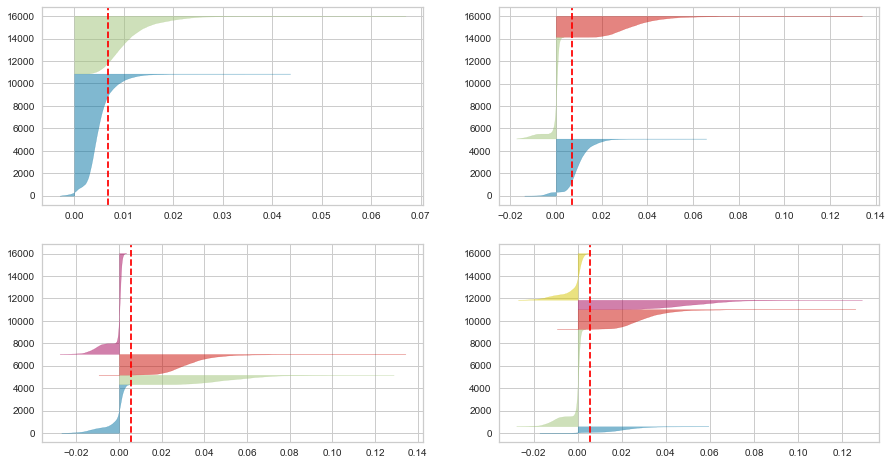

In [80]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [133]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X.toarray())
kmeans = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.figure(figsize=(14, 7))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=40, cmap='viridis', linewidths=5)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6);

C:\Users\samik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [82]:
print(kmeans.score(Y_sklearn))

-28.70961057428397


Twitter

In [14]:
!pip install snscrape

In [83]:
import snscrape.modules.twitter as sntwitter
import itertools

In [46]:
loc = '29.170609,77.237242, 232km'
until ='2022-01-01'
since ='2022-01-02'
query = ' lang:en  single_date:'+since+ ' geocode:"{}"'
df =  pd.DataFrame(itertools .islice(sntwitter.TwitterSearchScraper(' lang:en until:2022-06-30 since:2022-01-01 geocode:"{}"'.format(loc)).get_items(), 10))[['user', 'date','content','coordinates','hashtags','place']]
df.head(5)

,user,date,content,coordinates,hashtags,place
0,"{'username': 'bhadanapawan7', 'id': 1065313373...",2022-06-29 23:59:33+00:00,@UberINSupport @Uber_India @Uber highly unprof...,"{'longitude': 76.84252, 'latitude': 28.397657}",None,"{'fullName': 'New Delhi, India', 'name': 'New ..."
1,"{'username': 'SunilYadavRao', 'id': 140723987,...",2022-06-29 23:56:54+00:00,"Welcome To Gurugram, Dear Monsoon\n\n#Rain #Gu...","{'longitude': 76.707671, 'latitude': 28.199529}","[Rain, GurugramRain, WaterLogging, DelhiRains]","{'fullName': 'Gurgaon, India', 'name': 'Gurgao..."
2,"{'username': 'BShambhavi93', 'id': 11566657656...",2022-06-29 23:54:53+00:00,And what a critical time to watch #midnightmas...,"{'longitude': 76.84252, 'latitude': 28.397657}",[midnightmass],"{'fullName': 'New Delhi, India', 'name': 'New ..."
3,"{'username': 'BShambhavi93', 'id': 11566657656...",2022-06-29 23:52:24+00:00,"The quaint location, the philosophizing monolo...","{'longitude': 76.84252, 'latitude': 28.397657}",None,"{'fullName': 'New Delhi, India', 'name': 'New ..."
4,"{'username': 'RajeevK35893516', 'id': 15228700...",2022-06-29 23:51:28+00:00,@SushilaNetam @cu_shar Are you right,"{'longitude': 76.84252, 'latitude': 28.397657}",None,"{'fullName': 'New Delhi, India', 'name': 'New ..."


In [7]:
df.shape

(10000, 6)

In [18]:
loc = '29.170609,77.237242, 232km'
df_1 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(' lang:en until:2022-06-30 since:2022-01-01 geocode:"{}"'.format(loc)).get_items(), 10))[['user', 'date','content','coordinates','hashtags','place']]
df_1.head(5)

,user,date,content,coordinates,hashtags,place
0,"{'username': 'bhadanapawan7', 'id': 1065313373...",2022-06-29 23:59:33+00:00,@UberINSupport @Uber_India @Uber highly unprof...,"{'longitude': 76.84252, 'latitude': 28.397657}",None,"{'fullName': 'New Delhi, India', 'name': 'New ..."
1,"{'username': 'SunilYadavRao', 'id': 140723987,...",2022-06-29 23:56:54+00:00,"Welcome To Gurugram, Dear Monsoon\n\n#Rain #Gu...","{'longitude': 76.707671, 'latitude': 28.199529}","[Rain, GurugramRain, WaterLogging, DelhiRains]","{'fullName': 'Gurgaon, India', 'name': 'Gurgao..."
2,"{'username': 'BShambhavi93', 'id': 11566657656...",2022-06-29 23:54:53+00:00,And what a critical time to watch #midnightmas...,"{'longitude': 76.84252, 'latitude': 28.397657}",[midnightmass],"{'fullName': 'New Delhi, India', 'name': 'New ..."
3,"{'username': 'BShambhavi93', 'id': 11566657656...",2022-06-29 23:52:24+00:00,"The quaint location, the philosophizing monolo...","{'longitude': 76.84252, 'latitude': 28.397657}",None,"{'fullName': 'New Delhi, India', 'name': 'New ..."
4,"{'username': 'RajeevK35893516', 'id': 15228700...",2022-06-29 23:51:28+00:00,@SushilaNetam @cu_shar Are you right,"{'longitude': 76.84252, 'latitude': 28.397657}",None,"{'fullName': 'New Delhi, India', 'name': 'New ..."


In [1]:
df_1.head(5)

NameError: name 'df_1' is not defined

In [110]:
df_tweets.to_csv(r'C:\Users\samik\Documents\emotion analysis\twitterpredplot.csv', index=False)

In [202]:
from datetime import datetime
dt = pd.date_range(start="2021-07-01",end="2022-06-30").to_pydatetime().tolist()
print(dt)

[datetime.datetime(2022, 3, 1, 0, 0), datetime.datetime(2022, 3, 2, 0, 0), datetime.datetime(2022, 3, 3, 0, 0), datetime.datetime(2022, 3, 4, 0, 0), datetime.datetime(2022, 3, 5, 0, 0), datetime.datetime(2022, 3, 6, 0, 0), datetime.datetime(2022, 3, 7, 0, 0), datetime.datetime(2022, 3, 8, 0, 0), datetime.datetime(2022, 3, 9, 0, 0), datetime.datetime(2022, 3, 10, 0, 0), datetime.datetime(2022, 3, 11, 0, 0), datetime.datetime(2022, 3, 12, 0, 0), datetime.datetime(2022, 3, 13, 0, 0), datetime.datetime(2022, 3, 14, 0, 0), datetime.datetime(2022, 3, 15, 0, 0), datetime.datetime(2022, 3, 16, 0, 0), datetime.datetime(2022, 3, 17, 0, 0), datetime.datetime(2022, 3, 18, 0, 0), datetime.datetime(2022, 3, 19, 0, 0), datetime.datetime(2022, 3, 20, 0, 0), datetime.datetime(2022, 3, 21, 0, 0), datetime.datetime(2022, 3, 22, 0, 0), datetime.datetime(2022, 3, 23, 0, 0), datetime.datetime(2022, 3, 24, 0, 0), datetime.datetime(2022, 3, 25, 0, 0), datetime.datetime(2022, 3, 26, 0, 0), datetime.datetime(20

In [131]:
loc = '28.613012,77.200782, 25km'

tweets_list2 = []
for a,b in result:
    start = a
    end = b
    #print(start)
    #print(end)s

    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(' lang:en since_time:{} until_time:{} geocode:"{}"'.format(start, end,loc)).get_items()):
        if i>150:
            break
        tweets_list2.append([tweet.user, tweet.date,tweet.content,tweet.coordinates,tweet.hashtags,tweet.place])

df_ncr = pd.DataFrame(tweets_list2, columns=['user', 'date','content','coordinates','hashtags','place'])
df_ncr.head(5)

,user,date,content,coordinates,hashtags,place
0,https://twitter.com/Abh1sh3k_HM,2022-02-28 19:29:43+00:00,Very much True @GhoshSubhag da . Where the ind...,"Coordinates(longitude=77.302126, latitude=28.4...",None,"Place(fullName='Noida, India', name='Noida', t..."
1,https://twitter.com/CASaurabhChabra,2022-02-28 19:28:10+00:00,Meme of the day @GovtofPakistan @Russia https:...,"Coordinates(longitude=76.84252, latitude=28.39...",None,"Place(fullName='New Delhi, India', name='New D..."
2,https://twitter.com/MuditHastir,2022-02-28 19:27:44+00:00,@chiragbarjatyaa @twinitisha come on do it .. ...,"Coordinates(longitude=76.84252, latitude=28.39...",None,"Place(fullName='New Delhi, India', name='New D..."
3,https://twitter.com/payalmehta100,2022-02-28 19:27:07+00:00,Dear @priyankac19 you don’t need to prove your...,"Coordinates(longitude=76.84252, latitude=28.39...",None,"Place(fullName='New Delhi, India', name='New D..."
4,https://twitter.com/Sitanshusaran_,2022-02-28 19:27:06+00:00,@Tvya_97 Come on there are plenty,"Coordinates(longitude=76.84252, latitude=28.39...",None,"Place(fullName='New Delhi, India', name='New D..."


In [206]:
def daterange(start_date, end_date):
    delta = timedelta(hours=1)
    while start_date < end_date:
        yield start_date
        start_date += delta
        
from datetime import datetime, timedelta
list_epo = []
start_date = datetime(2022, 6, 1, 00, 00)
end_date = datetime(2022, 7, 31, 23, 59)
for single_date in daterange(start_date, end_date):
   list_epo.append(datetime.strptime(str(single_date), '%Y-%m-%d %H:%M:%S').timestamp())

In [207]:
#list_ = [for i in list_epo]
result =[(int(a),int(b)) for a,b in zip(list_epo,list_epo[1:])]
print(result)

[(1654021800, 1654025400), (1654025400, 1654029000), (1654029000, 1654032600), (1654032600, 1654036200), (1654036200, 1654039800), (1654039800, 1654043400), (1654043400, 1654047000), (1654047000, 1654050600), (1654050600, 1654054200), (1654054200, 1654057800), (1654057800, 1654061400), (1654061400, 1654065000), (1654065000, 1654068600), (1654068600, 1654072200), (1654072200, 1654075800), (1654075800, 1654079400), (1654079400, 1654083000), (1654083000, 1654086600), (1654086600, 1654090200), (1654090200, 1654093800), (1654093800, 1654097400), (1654097400, 1654101000), (1654101000, 1654104600), (1654104600, 1654108200), (1654108200, 1654111800), (1654111800, 1654115400), (1654115400, 1654119000), (1654119000, 1654122600), (1654122600, 1654126200), (1654126200, 1654129800), (1654129800, 1654133400), (1654133400, 1654137000), (1654137000, 1654140600), (1654140600, 1654144200), (1654144200, 1654147800), (1654147800, 1654151400), (1654151400, 1654155000), (1654155000, 1654158600), (1654158600

In [155]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\samik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [208]:
loc = '28.613012,77.200782, 50km' 

tweets_list2 = []
for a,b in result:
    start = a
    end = b
    #print(start)
    #print(end)s

    for i,tweet in enumerate(sntwitter.TwitterSearchScraper('city OR area OR amenities OR facility OR muncipality OR road OR traffic OR workplace OR environment OR location OR feel OR experience OR review OR place OR quality OR home OR surroundings OR ambience lang:en since_time:{} until_time:{} geocode:"{}"'.format(start, end,loc)).get_items()):
        if i>500:
            break
        tweets_list2.append([tweet.user, tweet.date,tweet.content,tweet.coordinates,tweet.hashtags,tweet.place])

df_ncr = pd.DataFrame(tweets_list2, columns=['user', 'date','content','coordinates','hashtags','place'])
df_ncr.head(5)
df_ncr.to_csv(r'C:\Users\samik\Documents\emotion analysis\twittert101.csv', index=False)

In [76]:
df_tweets = pd.read_csv("twittertt.csv");

In [100]:
df_tweets['content'] = df_tweets['content'].apply(nfx.remove_punctuations)
df_tweets['content'] = df_tweets['content'].apply(nfx.remove_html_tags)
df_tweets['content'] = df_tweets['content'].apply(nfx.remove_numbers)
df_tweets['content'] = df_tweets['content'].apply(nfx.remove_urls)
df_tweets['content'] = df_tweets['content'].apply(nfx.remove_userhandles)
df_tweets['content'] = df_tweets['content'].apply(nfx.remove_special_characters)
df_tweets['content'] = df_tweets['content'].apply(nfx.remove_emojis)
df_tweets.apply(lambda x: x.astype(str).str.lower())
df_tweets['content'] = df_tweets['content'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords_list]))
words = set(nltk.corpus.words.words())
def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in words or not w.isalpha())

df_tweets['content'] = df_tweets['content'].apply(clean_sent)
df_tweets['tokenized_text'] = df_tweets['content'].apply(nltk.word_tokenize)

In [106]:
XfeaturesC = df_tweets['tokenized_text']
X1 = tfidf.transform(XfeaturesC)

In [121]:
df_tweets['pred'] = dTree_clf.predict(X1)

In [122]:
print(df_tweets['pred'].unique())
print(df_tweets['pred'].value_counts())

['sadness' 'anger' 'surprise' 'fear' 'joy' 'love']
anger       99739
sadness     10261
fear         9847
joy          9667
love          721
surprise      625
Name: pred, dtype: int64


C:\Users\samik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


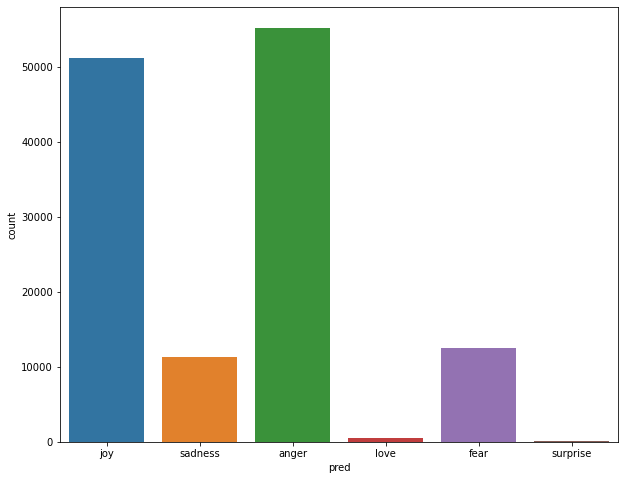

In [109]:
plt.figure(figsize = (10,8))
sns.countplot(df_tweets['pred'])
plt.show()

In [128]:
df4 = pd.read_csv('twitterpredplot.csv')

C:\Users\samik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

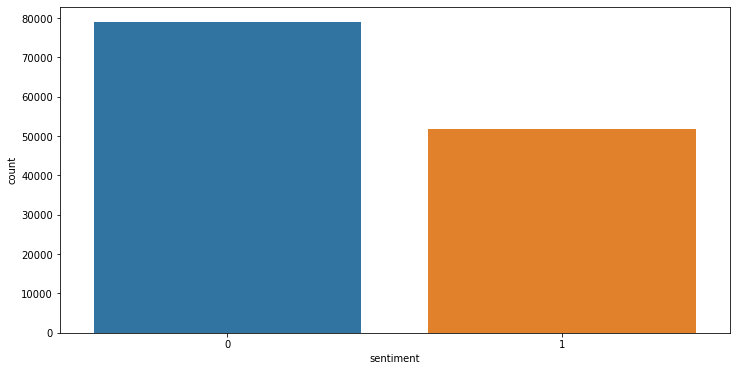

In [130]:
plt.figure(figsize=(12,6))
sns.countplot(df4['sentiment'])